In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple"> 零空间 </font>

零空间，记作 $\text{Nul}A$，是齐次线性系统 $Ax=0$ 的解集。

零空间始终是 $\mathbb{R}^n$ 的子空间，为什么？因为解总是可以位于原点 $(0, 0, ...)$。

举个例子，考虑一个线性系统。

$$
2x_1-x_2+x_3 = 0\\
x_1+2x_2+3x_3= 0 
$$

增广矩阵是

$$
\left[
\begin{matrix}
2 & -1 & 1 & 0\\
1 & 2 & 3 & 0
\end{matrix}
\right]
$$

在解系统之前，我们已经知道由于存在自由变量，即三个变量中有两个方程，所以不存在唯一解。

解决得到行阶梯形式。

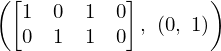

In [28]:
Aug = sy.Matrix([[2,-1,1,0],[1,2,3,0]])
Aug.rref()

$x_3$ 是一个自由变量，解集可以写为

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
-x_3 \\ -x_3 \\ x_3
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
-1 \\ -1 \\ 1
\end{matrix}
\right]
$$

这是一条直线，经过原点 $(0, 0, 0)$ 和 $(-1, -1, 1)$，也是 $\mathbb{R}^3$ 的子空间。

考虑另一个例子，假设我们有一个增广矩阵

In [2]:
Aug = sy.Matrix([[-3,6,-1,1,-7,0],[1,-2,2,3,-1,0],[2,-4,5,8,-4,0]]);Aug

⎡-3  6   -1  1  -7  0⎤
⎢                    ⎥
⎢1   -2  2   3  -1  0⎥
⎢                    ⎥
⎣2   -4  5   8  -4  0⎦

In [3]:
Aug.rref()

⎛⎡1  -2  0  -1  3   0⎤        ⎞
⎜⎢                   ⎥        ⎟
⎜⎢0  0   1  2   -2  0⎥, (0, 2)⎟
⎜⎢                   ⎥        ⎟
⎝⎣0  0   0  0   0   0⎦        ⎠

解可以写为：

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3 \\x_4 \\ x_5
\end{matrix}
\right]=
\left[
\begin{matrix}
2x_2+x_4-3x_5 \\ x_2 \\ -2x_4+2x_5 \\x_4 \\ x_5
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
2 \\ 1 \\ 0 \\0 \\ 0
\end{matrix}
\right]
+
x_4\left[
\begin{matrix}
1 \\ 0 \\ -2 \\1 \\ 0
\end{matrix}
\right]
+x_5\left[
\begin{matrix}
-3 \\ 0 \\ 2 \\0 \\ 1
\end{matrix}
\right]
$$

$\text{Nul}A$ 是 $\mathbb{R}^5$ 中的一个子空间，其中 $\text{dim}A=3$。

# <font face="gotham" color="purple"> 零空间与列空间 </font>

考虑矩阵 $A$

In [4]:
A = sy.Matrix([[2,4,-2,1],[-2,-5,7,3],[3,7,-8,6]]);A

⎡2   4   -2  1⎤
⎢             ⎥
⎢-2  -5  7   3⎥
⎢             ⎥
⎣3   7   -8  6⎦

列空间是 $\mathbb{R}^n$ 中的一个子空间，$n$ 是行数，$n=3$。

零空间是 $\mathbb{R}^m$ 中的一个子空间，$m$ 是列数，$m=4$。

如何找到 $\text{Col}A$ 和 $\text{Nul}A$ 中的任何非零向量？

矩阵中的任何列都可以是 $\text{Col}A$ 中的非零向量，例如第一列：$(2, -2, 3)^T$。

但要找到零空间中的非零向量需要一些努力，需要构造增广矩阵，然后将其转换为行简化阶梯形式。

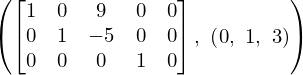

In [32]:
Aug = sy.Matrix([[2,4,-2,1,0],[-2,-5,7,3,0],[3,7,-8,6,0]]);Aug.rref()

由于第三列没有主元，解集中有一个自由变量 $x_3$，因此解集为

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3\\x_4
\end{matrix}
\right]=
\left[
\begin{matrix}
-9x_3 \\ 5x_3 \\ x_3\\0
\end{matrix}
\right]
$$

如果我们选择 $x_3 =1$，那么 $\text{Nul}A$ 中的一个非零向量是 $(-9, 5, 1, 0)^T$

现在考虑两个向量

$$
u = \left[
\begin{matrix}
3 \\ -2 \\ -1\\ 0 
\end{matrix}
\right],\qquad
v = \left[
\begin{matrix}
3 \\ -1\\3
\end{matrix}
\right]\\
$$

$u$ 是否在 $\text{Nul}A$ 中？这可以很容易地验证

In [5]:
u = sy.Matrix([[3],[-2],[-1],[0]])
A*u

⎡0 ⎤
⎢  ⎥
⎢-3⎥
⎢  ⎥
⎣3 ⎦

$Au\neq \mathbf{0}$，因此 $u$ 不在 $\text{Nul}A$ 中。

要验证 $v$ 是否在 $\text{Col}A$ 中，我们可以构建一个包含 $v$ 的增广矩阵，然后求解它。

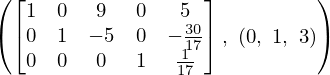

In [34]:
v = sy.Matrix([[3],[-1],[3]])
A.row_join(v).rref()

增广矩阵显示存在解，即 $v$ 是其列空间基向量的线性组合，因此 $v$ 在 $\text{Col}A$ 中。

# <font face="gotham" color="purple"> 行空间 </font>

行空间，记为 $\text{Row}A$，包含所有行向量的线性组合，并且是 $\mathbb{R}^n$ 中的子空间。

如果我们对 $A$ 执行行运算得到 $B$，那么这两个矩阵具有相同的行空间，因为 $B$ 的行是 $A$ 的行的线性组合。然而，行运算会改变行的依赖关系。

## <font face="gotham" color="purple"> 一个例子 </font>

找到的行空间、列空间和零空间

In [6]:
A = sy.Matrix([[-2, -5, 8, 0, -17],
               [1, 3, -5, 1, 5], 
               [3, 11, -19, 7, 1], 
               [1, 7, -13, 5, -3]]);A

⎡-2  -5   8   0  -17⎤
⎢                   ⎥
⎢1   3   -5   1   5 ⎥
⎢                   ⎥
⎢3   11  -19  7   1 ⎥
⎢                   ⎥
⎣1   7   -13  5  -3 ⎦

In [7]:
B = A.rref();B

⎛⎡1  0  1   0  1 ⎤           ⎞
⎜⎢               ⎥           ⎟
⎜⎢0  1  -2  0  3 ⎥           ⎟
⎜⎢               ⎥, (0, 1, 3)⎟
⎜⎢0  0  0   1  -5⎥           ⎟
⎜⎢               ⎥           ⎟
⎝⎣0  0  0   0  0 ⎦           ⎠

矩阵 $B$ 的行空间的基是它的前 3 行：$(1,0,1,0,1), (0, 1, -2, 0, 3), (0, 0, 0, 1, -5)$，这也是矩阵 $A$ 的行空间的基。然而，并不意味着 $A$ 的前 3 行就构成了行空间的基，因为行操作改变了行之间的依赖关系。

相比之下，$A$ 的列空间的基是 $(-2, 1, 3, 1)^T, (-5, 3, 11, 7)^T, (0, 1, 7, 5)^T$。

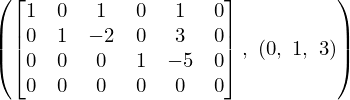

In [54]:
Aug = A.row_join(sy.zeros(4,1));Aug.rref()

零空间是

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3\\x_4 \\x_5
\end{matrix}
\right]=
\left[
\begin{matrix}
-x_3-x_5 \\ 2x_3-3x_5 \\ x_3\\5x_5 \\x_5
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
-1 \\ 2 \\ 1\\0 \\0
\end{matrix}
\right]+
x_5
\left[
\begin{matrix}
-1 \\ -3 \\ 0\\5 \\1
\end{matrix}
\right]
$$

# <font face="gotham" color="purple"> 秩 </font>

秩是 $A$ 的列空间的维数。$A$ 的**零度**是零空间的维数。

## <font face="gotham" color="purple"> 秩定理</font>

$m \times n$矩阵$A$的列空间和行空间的维度相等，这就是为什么我们只需要说秩是列空间的维度。

这个共同的维度，矩阵$A$的秩，也等于$A$中的主元位置数量，并满足下列方程
$$
\operatorname{rank} A+\operatorname{dim} \mathrm{Nul} A=n
$$

直觉上，当一个矩阵$A$被转换成行最简形式$rref$ $B$时，我们可以间接地（将$B$中相同的列与$A$匹配）看到列空间的基，对应$rref$中的列具有主元。

在行最简形式$rref$中，我们也可以直接看到行空间的基，行空间的每一行都必须有一个主元。而那些没有主元的行对应于自由变量，也就是零空间的维度。

## <font face="gotham" color="purple"> 例 1 </font>

如果$A$是一个$45 \times 50$的矩阵，其零空间的维度是$10$，那么$A$的秩是多少？

$10$维零空间意味着有$10$个自由变量，因此主元的数量为$50-10=40$，这也是$A$的秩。

## <font face="gotham" color="purple"> 例 2 </font>

以下矩阵是行等价的。
$$
A=\left[\begin{array}{rrrrr}
2 & -1 & 1 & -6 & 8 \\
1 & -2 & -4 & 3 & -2 \\
-7 & 8 & 10 & 3 & -10 \\
4 & -5 & -7 & 0 & 4
\end{array}\right], \quad B=\left[\begin{array}{rrrrr}
1 & -2 & -4 & 3 & -2 \\
0 & 3 & 9 & -12 & 12 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0
\end{array}\right]
$$
1. 找到矩阵$A$的秩和$\operatorname{dim}$ Nul $A$。
2. 找到$A$的列空间和行空间的基。
3. 要找到零空间的基，下一步是什么？
4. 在$A^{T}$的行梯形形式中有多少主元列？

1. $rank(A)=2$，因为$B$有两个主元。而零空间的维度等于自由变量的数量，这里有3个，所以$\text{dim Nul}A = 3$。

In [8]:
A = sy.Matrix([[2,-1,1,-6,8,0],
               [1,-2,-4,3,-2,0],
               [-7,8,10,3,-10,0],
               [4,-5,-7,0,4,0]])
A.rref()

⎛⎡1  0  2  -5  6  0⎤        ⎞
⎜⎢                 ⎥        ⎟
⎜⎢0  1  3  -4  4  0⎥        ⎟
⎜⎢                 ⎥, (0, 1)⎟
⎜⎢0  0  0  0   0  0⎥        ⎟
⎜⎢                 ⎥        ⎟
⎝⎣0  0  0  0   0  0⎦        ⎠

2. $\text{Col}A$的基是$(2,1,-7,4)^T, (-1,-2,8,-5)^T$，$\text{Row}A$的基是$(1,-2,-4,3,-2),(0,3,9,-12,12)$。

$\text{Nul}A$的基是

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3\\x_4 \\x_5
\end{matrix}
\right]=
\left[
\begin{matrix}
-2x_3+5x_4-6x_5 \\ -3x_3+4x_4-4x_5 \\ x_3\\x_4 \\x_5
\end{matrix}
\right]=
x_3
\left[
\begin{matrix}
-2 \\ -3 \\ 1\\0 \\0
\end{matrix}
\right]+
x_4
\left[
\begin{matrix}
5 \\ 4 \\ 0\\1 \\0
\end{matrix}
\right]+
x_5
\left[
\begin{matrix}
-6 \\ -4 \\ 0\\0 \\1
\end{matrix}
\right]
$$

3. 对增广矩阵$A$进行行最简形式（rref）操作。

4. 将$A$转置，然后进行行最简形式（rref）操作。

In [9]:
A.T.rref()

⎛⎡1  0  -2  1⎤        ⎞
⎜⎢           ⎥        ⎟
⎜⎢0  1  -3  2⎥        ⎟
⎜⎢           ⎥        ⎟
⎜⎢0  0  0   0⎥        ⎟
⎜⎢           ⎥, (0, 1)⎟
⎜⎢0  0  0   0⎥        ⎟
⎜⎢           ⎥        ⎟
⎜⎢0  0  0   0⎥        ⎟
⎜⎢           ⎥        ⎟
⎝⎣0  0  0   0⎦        ⎠

有2个主元列。

实际上，我们不需要进行任何计算就可以知道$A^T$的秩，因为

$$
\text{rank}(A)=\text{rank}(A^T)
$$

# <font face="gotham" color="purple"> $\text{Nul}A$ 和 $\text{Row}A$ 的正交性 </font>

##  <font face="gotham" color="purple"> $\text{Nul}A \perp \text{Row}A$  </font>

这些我们讨论过的子空间之间有着有趣的联系。考虑

In [10]:
A = sy.Matrix([[5, 8, 2], [10, 16, 4], [3, 4, 1]]);A

⎡5   8   2⎤
⎢         ⎥
⎢10  16  4⎥
⎢         ⎥
⎣3   4   1⎦

In [11]:
A.rref()

⎛⎡1  0   0 ⎤        ⎞
⎜⎢         ⎥        ⎟
⎜⎢0  1  1/4⎥, (0, 1)⎟
⎜⎢         ⎥        ⎟
⎝⎣0  0   0 ⎦        ⎠

矩阵$A$的行空间的基是$(1, 0, 0)$和$(0, 1, .25)$。而$\text{Row}A$是

$$
\text{Row}A=
s\left[
\begin{matrix}
1 \\ 0\\ 0
\end{matrix}
\right]+
t\left[
\begin{matrix}
0 \\ 1\\ 0.25
\end{matrix}
\right]
$$

$\text{Nul}A$是
$$
\left[
\begin{matrix}
x_1 \\ x_2\\ x_3
\end{matrix}
\right]=
x_3
\left[
\begin{matrix}
0 \\ -.25\\ 1
\end{matrix}
\right]
$$

现在我们可以在几何上可视化它们的关系。再次记住，Matplotlib不能正确地渲染3D，所以你需要一些想象力。

这是我们观察到的：

$\text{Row}A$是一个平面，而$\text{Nul}A$是与该平面垂直的一条直线。如果你注意到在一个齐次系统$Ab = \mathbf{0}$中，它会分解成许多点积，这个想法就很容易理解。

$$
Ab =\left[
\begin{matrix}
A_{1i}\cdot b \\ A_{2i}\cdot b\\ A_{3i}\cdot b
\end{matrix}
\right]
$$

其中$A_{1i}, A_{2i}, A_{3i}$是矩阵$A$的行。在后面的章节中，我们将证明当两个向量的点积等于零时，这意味着它们在几何上是垂直的。

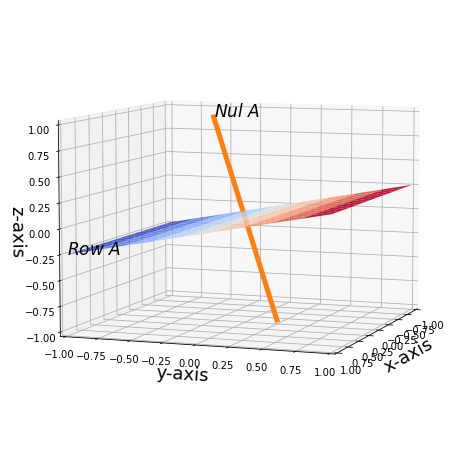

In [10]:
%matplotlib inline
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

X = S
Y = T
Z = T*.25

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z, alpha = .9, cmap=plt.cm.coolwarm)

x3 = np.linspace(-1, 1, 10)
x1 = 0*x3
x2 = -.25*x3
ax.plot(x1,x2,x3, lw = 5)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.axis([-1,1,-1,1])

ax.text(x = 1, y = -1, z = -.25, s = r'$Row\ A$', size = 17)
ax.text(0, -.25, 1, s = r'$Nul\ A$', size = 17)

ax.view_init(7, 20)
plt.show()

##  <font face="gotham" color="purple"> $\text{Nul}A^T \perp \text{Col}A$  </font>

矩阵$A^T$的零空间的维度是

In [12]:
A = sy.Matrix([[5, 8, 2], [10, 16, 4], [3, 4, 1]]);A.T.rref()

⎛⎡1  2  0⎤        ⎞
⎜⎢       ⎥        ⎟
⎜⎢0  0  1⎥, (0, 2)⎟
⎜⎢       ⎥        ⎟
⎝⎣0  0  0⎦        ⎠

$\text{Nul}A^T$是

$$
\left[
\begin{matrix}
x_1 \\ x_2\\ x_3
\end{matrix}
\right]=
x_2
\left[
\begin{matrix}
-2 \\ 1\\ 0
\end{matrix}
\right]
$$

$\text{Col}A$是

In [13]:
A.rref()

⎛⎡1  0   0 ⎤        ⎞
⎜⎢         ⎥        ⎟
⎜⎢0  1  1/4⎥, (0, 1)⎟
⎜⎢         ⎥        ⎟
⎝⎣0  0   0 ⎦        ⎠

$$
\text{Col}A=
s\left[
\begin{matrix}
5 \\ 10\\ 3
\end{matrix}
\right]+
t\left[
\begin{matrix}
8 \\ 16\\ 4
\end{matrix}
\right]
$$

$\text{Col}A$是一个平面，而$\text{Nul}A^T$是与该平面垂直的一条直线。直觉类似于$\text{Nul}A \perp \text{Row}A$，这里你可以将其看作一个形式类似于$b^TA = \mathbf{0}^T$的系统。

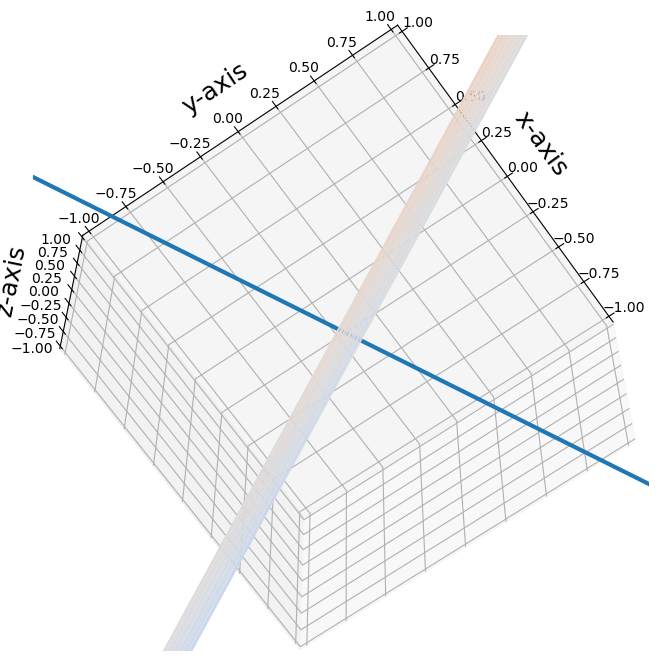

In [24]:
%matplotlib inline
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

X = 5*S+8*T
Y = 10*S+16*T
Z = 3*S+4*T

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm)

x2 = np.linspace(-1, 1, 10)
x3 = x2*0
x1 = -2*x2

ax.plot(x1,x2,x3, lw = 3)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.axis([-1,1,-1,1,-1,1])

ax.view_init(-67, 35)

# <font face="gotham" color="purple"> 秩分解 </font>

考虑一个矩阵$A$，其目的是将其分解为$C$和$R$的乘积，$C$和$R$分别是列空间和行空间的基。

$$
A = CR
$$

In [15]:
A = sy.Matrix([[2, 4, 1, -1], [4, 2, -4, 2], [2, -2, -5, 3], [1, 9, -3, 2]]);A

⎡2  4   1   -1⎤
⎢             ⎥
⎢4  2   -4  2 ⎥
⎢             ⎥
⎢2  -2  -5  3 ⎥
⎢             ⎥
⎣1  9   -3  2 ⎦

In [16]:
Arref = A.rref();Arref

⎛⎡1  0  0  -4/21⎤           ⎞
⎜⎢              ⎥           ⎟
⎜⎢0  1  0  1/63 ⎥           ⎟
⎜⎢              ⎥           ⎟
⎜⎢         -43  ⎥, (0, 1, 2)⎟
⎜⎢0  0  1  ──── ⎥           ⎟
⎜⎢          63  ⎥           ⎟
⎜⎢              ⎥           ⎟
⎝⎣0  0  0    0  ⎦           ⎠

获取$\text{Col}A$的基。

In [17]:
ColA_basis = A[:,:3];ColA_basis

⎡2  4   1 ⎤
⎢         ⎥
⎢4  2   -4⎥
⎢         ⎥
⎢2  -2  -5⎥
⎢         ⎥
⎣1  9   -3⎦

然后获取$\text{Row}A$。

In [18]:
RowA_basis = Arref[0][0:3,:];RowA_basis

⎡1  0  0  -4/21⎤
⎢              ⎥
⎢0  1  0  1/63 ⎥
⎢              ⎥
⎢         -43  ⎥
⎢0  0  1  ──── ⎥
⎣          63  ⎦

将$CR$相乘，我们会得到$A$。

In [19]:
ColA_basis*RowA_basis

⎡2  4   1   -1⎤
⎢             ⎥
⎢4  2   -4  2 ⎥
⎢             ⎥
⎢2  -2  -5  3 ⎥
⎢             ⎥
⎣1  9   -3  2 ⎦

验证$CR$是否等于$A$。

In [50]:
ColA_basis*RowA_basis == A

True